In [137]:
import requests
with open('kaptcha.jpg', 'wb') as f:
    res = requests.get('http://railway.hinet.net/ImageOut.jsp')
    f.write(res.content)

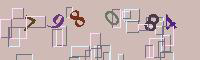

In [138]:
from PIL import Image
image = Image.open('kaptcha.jpg')
image

In [139]:
import PIL
import numpy

In [140]:
pil_image = PIL.Image.open('kaptcha.jpg').convert('RGB')
open_cv_image = numpy.array(pil_image)

Populating the interactive namespace from numpy and matplotlib


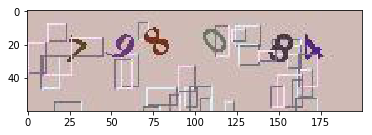

In [141]:
%pylab inline
from matplotlib import pyplot as plt
plt.imshow(open_cv_image)

In [142]:
import cv2
imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [143]:
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])

In [144]:
ary = []
for (c,_) in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    #print((x,y,w,h))
    if h > 30:continue
    if w > 50:continue
    if w >= 10 and h >= 13:
        ary.append((x,y,w,h))
        print((x,y,w,h)) 

(26, 15, 21, 15)
(50, 15, 15, 14)
(51, 28, 12, 19)
(69, 9, 17, 19)
(90, 33, 13, 26)
(104, 8, 16, 21)
(130, 9, 11, 16)
(143, 13, 20, 19)
(156, 25, 11, 14)
(165, 13, 13, 18)


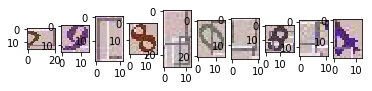

In [145]:
from matplotlib import pyplot as plt
fig = plt.figure()
for id, (x,y,w,h) in enumerate(ary):
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    a = fig.add_subplot(1, len(ary), id+1)
    plt.imshow(thresh)
